In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from dateutil.relativedelta import relativedelta, TH

In [137]:
intraday_trade_log = pd.read_csv('banknifty_short_straddle_920_1510_20%.csv')

In [152]:
intraday_trade_log['Entry_Datetime'] = intraday_trade_log['Entry_Datetime'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
intraday_trade_log['Date'] = intraday_trade_log['Entry_Datetime'].apply(lambda x: x.date())

<AxesSubplot:>

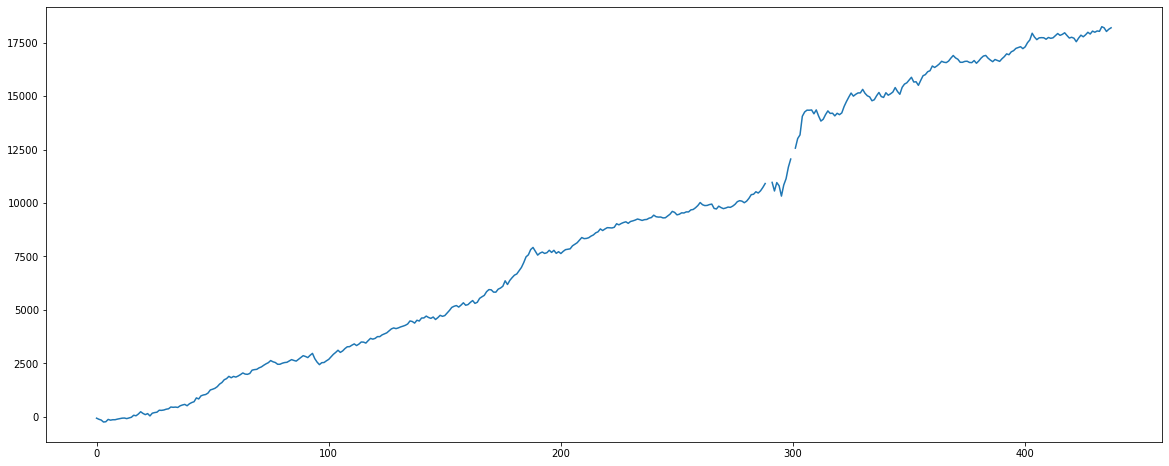

In [138]:
plt.figure(figsize=(20,8))
intraday_trade_log['PnL'].cumsum().plot()

In [139]:
intraday_trade_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entry_Datetime       438 non-null    object 
 1   Future_Traded_Price  438 non-null    float64
 2   ATM                  438 non-null    int64  
 3   Days_to_Expiry       438 non-null    int64  
 4   CE_Symbol            438 non-null    object 
 5   CE_Entry_Price       435 non-null    float64
 6   CE_Exit_Price        438 non-null    float64
 7   CE_Exit_Datetime     438 non-null    object 
 8   PE_Symbol            438 non-null    object 
 9   PE_Entry_Price       437 non-null    float64
 10  PE_Exit_Price        438 non-null    float64
 11  PE_Exit_Datetime     438 non-null    object 
 12  PnL                  435 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 44.6+ KB


In [140]:
import missingno as msno

<AxesSubplot:>

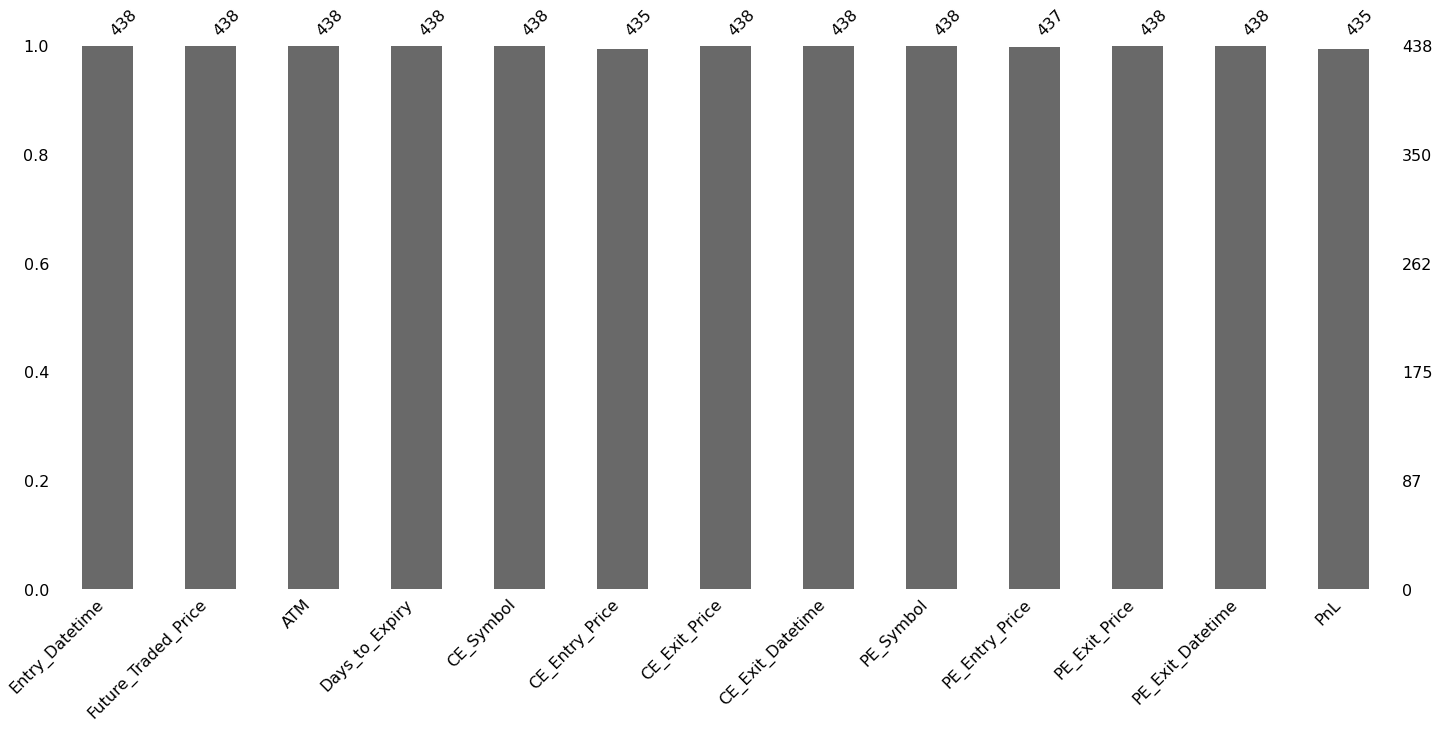

In [141]:
msno.bar(intraday_trade_log)

In [142]:
intraday_trade_log = intraday_trade_log[intraday_trade_log['CE_Entry_Price'].notna()]

In [143]:
intraday_trade_log = intraday_trade_log[intraday_trade_log['CE_Exit_Price'].notna()]

In [144]:
intraday_trade_log = intraday_trade_log[intraday_trade_log['PE_Entry_Price'].notna()]

In [145]:
intraday_trade_log = intraday_trade_log[intraday_trade_log['PE_Exit_Price'].notna()]

In [147]:
intraday_trade_log['PnL'] = (intraday_trade_log['CE_Entry_Price'] - intraday_trade_log['CE_Exit_Price']) + (intraday_trade_log['PE_Entry_Price'] - intraday_trade_log['PE_Exit_Price'])

<AxesSubplot:>

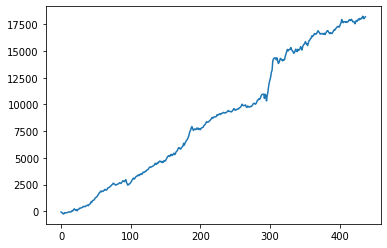

In [148]:
intraday_trade_log['PnL'].cumsum().plot()

In [149]:
insample_trade_log = intraday_trade_log[:int(len(intraday_trade_log)/2)]

In [150]:
outsample_trade_log = intraday_trade_log[int(len(intraday_trade_log)/2):]

In [151]:
initial_capital = 200000
intraday_trade_log['Quantity'] = 25

In [153]:
intraday_trade_log['Entry_Price'] = intraday_trade_log['CE_Entry_Price']+intraday_trade_log['PE_Entry_Price']
intraday_trade_log['Exit_Price'] = intraday_trade_log['CE_Exit_Price']+intraday_trade_log['PE_Exit_Price']

In [154]:
intraday_trade_log['Entry_Including_Slippage'] = intraday_trade_log['Entry_Price'] - (intraday_trade_log['Entry_Price']*0.02) #2% here means 1% for each ce and pe
intraday_trade_log['Exit_Including_Slippage'] = intraday_trade_log['Exit_Price'] + (intraday_trade_log['Exit_Price']*0.02) #2% here means 1% for each ce and pe

In [155]:
intraday_trade_log['PnL_Including_Slippages'] = (intraday_trade_log['Entry_Including_Slippage']-intraday_trade_log['Exit_Including_Slippage'])*intraday_trade_log['Quantity']

In [156]:
intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] = intraday_trade_log['PnL_Including_Slippages'].cumsum()

In [157]:
intraday_trade_log['Equity'] = 0
intraday_trade_log['Rate_of_Return'] = 0

In [158]:
intraday_trade_log

,Entry_Datetime,Future_Traded_Price,ATM,Days_to_Expiry,CE_Symbol,CE_Entry_Price,CE_Exit_Price,CE_Exit_Datetime,PE_Symbol,PE_Entry_Price,...,PnL,Quantity,Entry_Price,Exit_Price,Entry_Including_Slippage,Exit_Including_Slippage,PnL_Including_Slippages,PnL_Including_Slippages_Cumulative_Sum,Equity,Rate_of_Return
0,2019-01-01 09:20:00,27265.00,27300,2,BANKNIFTY03JAN1927300CE.NFO,100.00,120.00,2019-01-01 14:31:00,BANKNIFTY03JAN1927300PE.NFO,225.60,...,-65.12,25,325.60,390.72,319.088,398.5344,-1986.160,-1986.160,0,0
1,2019-01-02 09:20:00,27437.90,27400,1,BANKNIFTY03JAN1927400CE.NFO,99.05,118.86,2019-01-02 10:21:00,BANKNIFTY03JAN1927400PE.NFO,157.55,...,-51.32,25,256.60,307.92,251.468,314.0784,-1565.260,-3551.420,0,0
2,2019-01-03 09:20:00,27218.90,27200,0,BANKNIFTY03JAN1927200CE.NFO,48.10,57.72,2019-01-03 09:38:00,BANKNIFTY03JAN1927200PE.NFO,135.30,...,-36.68,25,183.40,220.08,179.732,224.4816,-1118.740,-4670.160,0,0
3,2019-01-04 09:20:00,27188.45,27200,6,BANKNIFTY10JAN1927200CE.NFO,179.60,215.52,2019-01-04 11:41:00,BANKNIFTY10JAN1927200PE.NFO,283.05,...,-92.53,25,462.65,555.18,453.397,566.2836,-2822.165,-7492.325,0,0
4,2019-01-07 09:20:00,27530.00,27500,3,BANKNIFTY10JAN1927500CE.NFO,137.75,82.35,2019-01-07 15:10:00,BANKNIFTY10JAN1927500PE.NFO,204.00,...,14.60,25,341.75,327.15,334.915,333.6930,30.550,-7461.775,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2020-10-14 09:20:00,23336.55,23400,1,BANKNIFTY15OCT2023400CE.NFO,223.25,267.90,2020-10-14 14:20:00,BANKNIFTY15OCT2023400PE.NFO,317.75,...,217.40,25,541.00,323.60,530.180,330.0720,5002.700,234646.925,0,0
434,2020-10-15 09:20:00,23727.10,23700,0,BANKNIFTY15OCT2023700CE.NFO,132.00,158.40,2020-10-15 09:37:00,BANKNIFTY15OCT2023700PE.NFO,133.70,...,-53.14,25,265.70,318.84,260.386,325.2168,-1620.770,233026.155,0,0
435,2020-10-16 09:20:00,23377.90,23300,6,BANKNIFTY22OCT2023300CE.NFO,459.60,551.52,2020-10-16 12:05:00,BANKNIFTY22OCT2023300PE.NFO,392.90,...,-170.50,25,852.50,1023.00,835.450,1043.4600,-5200.250,227825.905,0,0
436,2020-10-19 09:20:00,23875.00,23800,3,BANKNIFTY22OCT2023800CE.NFO,391.20,469.44,2020-10-19 09:45:00,BANKNIFTY22OCT2023800PE.NFO,329.75,...,103.76,25,720.95,617.19,706.531,629.5338,1924.930,229750.835,0,0


In [159]:
for i in range(len(list(intraday_trade_log.index))):

    if i == 0:
        intraday_trade_log['Equity'].iloc[i] = initial_capital + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/initial_capital)*100
    else:
        intraday_trade_log['Equity'].iloc[i] = intraday_trade_log['Equity'].iloc[i-1] + intraday_trade_log['PnL_Including_Slippages'].iloc[i]
        intraday_trade_log['Rate_of_Return'].iloc[i] = (intraday_trade_log['PnL_Including_Slippages'].iloc[i]/intraday_trade_log['Equity'].iloc[i-1])*100

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
intraday_trade_log

,Entry_Datetime,Future_Traded_Price,ATM,Days_to_Expiry,CE_Symbol,CE_Entry_Price,CE_Exit_Price,CE_Exit_Datetime,PE_Symbol,PE_Entry_Price,...,PnL,Quantity,Entry_Price,Exit_Price,Entry_Including_Slippage,Exit_Including_Slippage,PnL_Including_Slippages,PnL_Including_Slippages_Cumulative_Sum,Equity,Rate_of_Return
0,2019-01-01 09:20:00,27265.00,27300,2,BANKNIFTY03JAN1927300CE.NFO,100.00,120.00,2019-01-01 14:31:00,BANKNIFTY03JAN1927300PE.NFO,225.60,...,-65.12,25,325.60,390.72,319.088,398.5344,-1986.160,-1986.160,198013.840,-0.993080
1,2019-01-02 09:20:00,27437.90,27400,1,BANKNIFTY03JAN1927400CE.NFO,99.05,118.86,2019-01-02 10:21:00,BANKNIFTY03JAN1927400PE.NFO,157.55,...,-51.32,25,256.60,307.92,251.468,314.0784,-1565.260,-3551.420,196448.580,-0.790480
2,2019-01-03 09:20:00,27218.90,27200,0,BANKNIFTY03JAN1927200CE.NFO,48.10,57.72,2019-01-03 09:38:00,BANKNIFTY03JAN1927200PE.NFO,135.30,...,-36.68,25,183.40,220.08,179.732,224.4816,-1118.740,-4670.160,195329.840,-0.569482
3,2019-01-04 09:20:00,27188.45,27200,6,BANKNIFTY10JAN1927200CE.NFO,179.60,215.52,2019-01-04 11:41:00,BANKNIFTY10JAN1927200PE.NFO,283.05,...,-92.53,25,462.65,555.18,453.397,566.2836,-2822.165,-7492.325,192507.675,-1.444820
4,2019-01-07 09:20:00,27530.00,27500,3,BANKNIFTY10JAN1927500CE.NFO,137.75,82.35,2019-01-07 15:10:00,BANKNIFTY10JAN1927500PE.NFO,204.00,...,14.60,25,341.75,327.15,334.915,333.6930,30.550,-7461.775,192538.225,0.015869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,2020-10-14 09:20:00,23336.55,23400,1,BANKNIFTY15OCT2023400CE.NFO,223.25,267.90,2020-10-14 14:20:00,BANKNIFTY15OCT2023400PE.NFO,317.75,...,217.40,25,541.00,323.60,530.180,330.0720,5002.700,234646.925,434646.925,1.164382
434,2020-10-15 09:20:00,23727.10,23700,0,BANKNIFTY15OCT2023700CE.NFO,132.00,158.40,2020-10-15 09:37:00,BANKNIFTY15OCT2023700PE.NFO,133.70,...,-53.14,25,265.70,318.84,260.386,325.2168,-1620.770,233026.155,433026.155,-0.372893
435,2020-10-16 09:20:00,23377.90,23300,6,BANKNIFTY22OCT2023300CE.NFO,459.60,551.52,2020-10-16 12:05:00,BANKNIFTY22OCT2023300PE.NFO,392.90,...,-170.50,25,852.50,1023.00,835.450,1043.4600,-5200.250,227825.905,427825.905,-1.200909
436,2020-10-19 09:20:00,23875.00,23800,3,BANKNIFTY22OCT2023800CE.NFO,391.20,469.44,2020-10-19 09:45:00,BANKNIFTY22OCT2023800PE.NFO,329.75,...,103.76,25,720.95,617.19,706.531,629.5338,1924.930,229750.835,429750.835,0.449933


In [161]:
win_rate = round(len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])/len(intraday_trade_log),2)
print(f'Win Rate:{win_rate}')

Win Rate:0.63


In [162]:
mean_win = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].mean()
mean_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].mean()
risk_reward = abs(mean_win/mean_loss)
expectancy = round((win_rate*risk_reward) - ((1-win_rate)*1),2)

print(f'Expectancy:{expectancy}')

Expectancy:0.23


In [163]:
number_of_trading_days_in_a_year = 252
risk_free_interest_rate = 5
mean = intraday_trade_log['Rate_of_Return'].mean() * number_of_trading_days_in_a_year - risk_free_interest_rate
sigma = intraday_trade_log['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sharpe_ratio = round(mean/sigma,2)

print(f'Sharpe Ratio:{sharpe_ratio}')

Sharpe Ratio:2.81


In [164]:
downside_standard_deviation = intraday_trade_log[intraday_trade_log['Rate_of_Return']<0]['Rate_of_Return'].std() * np.sqrt(number_of_trading_days_in_a_year)
sortino_ratio = round(mean/downside_standard_deviation,2)
print(f'Sortino Ratio:{sortino_ratio}')

Sortino Ratio:4.07


In [165]:
intraday_trade_log['Drawdown'] = intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'] - intraday_trade_log['PnL_Including_Slippages_Cumulative_Sum'].cummax()
max_drawdown = round(intraday_trade_log['Drawdown'].min(),2)
print(f'Max Drawdown [Rs.] :{max_drawdown}')

max_drawdown_percent = round(max_drawdown/intraday_trade_log[intraday_trade_log['Drawdown'] == intraday_trade_log['Drawdown'].min()]['Equity'].iloc[0]*100,2)
print(f'Max Drawdown Percent:{max_drawdown_percent}')

Max Drawdown [Rs.] :-23432.6
Max Drawdown Percent:-7.05


In [167]:
intraday_trade_log['Recovery'] = 0
for i in range(len(intraday_trade_log)):
    if (intraday_trade_log['Drawdown'].iloc[i] < 0):
        intraday_trade_log['Recovery'].iloc[i] = intraday_trade_log['Recovery'].iloc[i-1] + 1
recovery_trades = intraday_trade_log['Recovery'].max()

print(f'Number of trades done from Drawdown to achieve a new peak: {recovery_trades}')

intraday_trade_log_equity_high = intraday_trade_log[intraday_trade_log['Recovery'] == 0]
intraday_trade_log_equity_high['number_days_between_equity_highs'] = (intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift())
recovery_days = int(intraday_trade_log_equity_high['number_days_between_equity_highs'].apply(lambda x: x.days).max())
print(f'Number of Days taken from Drawdown to achieve a new peak: {recovery_days}')

Number of trades done from Drawdown to achieve a new peak: 34
Number of Days taken from Drawdown to achieve a new peak: 45


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<ipython-input-167-2d0aee943f5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intraday_trade_log_equity_high['number_days_between_equity_highs'] = (intraday_trade_log_equity_high['Entry_Datetime'] - intraday_trade_log_equity_high['Entry_Datetime'].shift())


In [185]:
number_of_trading_days_for_this_backtest = (intraday_trade_log.iloc[-1]['Entry_Datetime'].date() - intraday_trade_log.iloc[0]['Entry_Datetime'].date()).days
cagr = (((intraday_trade_log.iloc[-1]['Equity']/initial_capital)**(1/(number_of_trading_days_for_this_backtest/365)))-1)*100
cagr = round(cagr,2)

print(f'CAGR:{cagr}')

CAGR:53.06


In [194]:
calmar_ratio = round(abs(cagr/max_drawdown_percent),2)

print(f'Calmar Ratio:{calmar_ratio}')

Calmar Ratio:7.53


In [200]:
backtest_start_date = intraday_trade_log.iloc[0]['Entry_Datetime'].date()
backtest_start_date

datetime.date(2019, 1, 1)

In [201]:
backtest_end_date = intraday_trade_log.iloc[-1]['Entry_Datetime'].date()
backtest_end_date

datetime.date(2020, 10, 20)

In [202]:
number_of_trades = len(intraday_trade_log)
number_of_trades

435

In [203]:
number_of_wins = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0])
print(f'Number of Wins: {number_of_wins}')

number_of_losses = len(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0])
print(f'Number of Losses: {number_of_losses}')

Number of Wins: 274
Number of Losses: 161


In [206]:
average_profit_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] > 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Profit Per Trade: {average_profit_per_trade}')

average_loss_per_trade = round(intraday_trade_log[intraday_trade_log['PnL_Including_Slippages'] < 0]['PnL_Including_Slippages'].mean(),2)
print(f'Average Loss Per Trade: {average_loss_per_trade}')

Average Profit Per Trade: 2205.9
Average Loss Per Trade: -2320.46


In [209]:
max_pnl = round(intraday_trade_log['PnL_Including_Slippages'].max(),2)
print(f'Max PnL Point:{max_pnl}')

min_pnl = round(intraday_trade_log['PnL_Including_Slippages'].min(),2)
print(f'Min PnL Point:{min_pnl}')

Max PnL Point:20188.68
Min PnL Point:-14718.38


In [213]:
median_of_trade = round(intraday_trade_log['PnL_Including_Slippages'].median(),2)
print(f'Median:{median_of_trade}')

Median:748.13


In [215]:
gross_profit = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']>0]['PnL_Including_Slippages'].sum()
gross_loss = intraday_trade_log[intraday_trade_log['PnL_Including_Slippages']<0]['PnL_Including_Slippages'].sum()

profit_factor = round(abs(gross_profit/gross_loss),2)
print(f'Profit Factor:{profit_factor}')

Profit Factor:1.62


In [216]:
outlier_adjusted_profit_factor = round(abs((gross_profit-max_pnl)/gross_loss),2)
print(f'Outlier Adjusted Profit Factor:{outlier_adjusted_profit_factor}')

Outlier Adjusted Profit Factor:1.56


In [217]:
intraday_trade_log['Continuous_Wins'] = 0
intraday_trade_log['Continuous_Losses'] = 0

In [218]:
for i in range(1,len(intraday_trade_log)):
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] > 0:
        intraday_trade_log['Continuous_Wins'].iloc[i] = intraday_trade_log['Continuous_Wins'].iloc[i-1]+1
    if intraday_trade_log['PnL_Including_Slippages'].iloc[i-1] < 0:
        intraday_trade_log['Continuous_Losses'].iloc[i] = intraday_trade_log['Continuous_Losses'].iloc[i-1]+1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [219]:
consecutive_wins = intraday_trade_log['Continuous_Wins'].max()
consecutive_losses = intraday_trade_log['Continuous_Losses'].max()
print(f'Consecutive Wins:{consecutive_wins}')
print(f'Consecutive Losses:{consecutive_losses}')

Consecutive Wins:13
Consecutive Losses:5


In [225]:
metrics = pd.DataFrame(columns=['Backtest Start Date','Backtest End Date','Number of Trades','Number of Wins','Number of Losses','Average Profit','Average Loss','Maximum Profit Points','Maximum Loss Points','Median Trade','Win Rate','Expectancy','Sharpe Ratio','Sortino Ratio','Max Drawdown','Max Drawdown Percent','Days Taken to Recover From Drawdown','Number of Trades to Recover From Drawdown','Calmar','CAGR','Consecutive Wins','Consecutive Losses','Profit Factor (Amount of Profit per unit of Loss)','Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)'])

In [227]:
metrics = metrics.append({'Backtest Start Date':backtest_start_date, 
                          'Backtest End Date':backtest_end_date, 
                          'Number of Trades':number_of_trades,
                          'Number of Wins':number_of_wins,
                          'Number of Losses':number_of_losses,
                          'Average Profit':average_profit_per_trade,
                          'Average Loss':average_loss_per_trade,
                          'Maximum Profit Points':max_pnl,
                          'Maximum Loss Points':min_pnl,
                          'Median Trade':median_of_trade,
                          'Win Rate':win_rate,
                          'Expectancy':expectancy,
                          'Sharpe Ratio':sharpe_ratio,
                          'Sortino Ratio':sortino_ratio,
                          'Max Drawdown':max_drawdown,
                          'Max Drawdown Percent':max_drawdown_percent,
                          'Days Taken to Recover From Drawdown':recovery_days,
                          'Number of Trades to Recover From Drawdown':recovery_trades,
                          'Calmar':calmar_ratio,
                          'CAGR':cagr,
                          'Consecutive Wins':consecutive_wins,
                          'Consecutive Losses':consecutive_losses,
                          'Profit Factor (Amount of Profit per unit of Loss)':profit_factor,
                          'Outlier Adjusted Profit Factor (Profit Factor except that One Exceptional Biggest Winner)':outlier_adjusted_profit_factor},ignore_index=True)

In [229]:
metrics.T

,0
Backtest Start Date,2019-01-01
Backtest End Date,2020-10-20
Number of Trades,435
Number of Wins,274
Number of Losses,161
Average Profit,2205.9
Average Loss,-2320.46
Maximum Profit Points,20188.68
Maximum Loss Points,-14718.38
Median Trade,748.13


In [240]:
returns = intraday_trade_log[['Entry_Datetime','Equity']]

In [241]:
returns.set_index('Entry_Datetime',inplace=True)

In [242]:
returns = returns.resample('M').last()

In [244]:
returns['%Change'] = returns['Equity'].pct_change()*100

In [246]:
returns.reset_index(inplace=True)

In [247]:
returns['Year'] = returns['Entry_Datetime'].apply(lambda x: x.year)
returns['Month'] = returns['Entry_Datetime'].apply(lambda x: x.month)

In [250]:
import calendar

In [254]:
returns['Month'] = returns['Month'].apply(lambda x: calendar.month_abbr[x])

In [257]:
returns = returns[['Entry_Datetime', '%Change', 'Year', 'Month']]

In [270]:
x = returns.groupby(['Year','Month'])['%Change'].mean()

In [271]:
broad_returns = x.unstack()

In [272]:
broad_returns['Total'] = broad_returns[broad_returns.columns].sum(axis=1)

In [273]:
broad_returns = broad_returns[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Total']]

In [275]:
broad_returns = round(broad_returns,2)

In [276]:
broad_returns

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
2019,NaN,3.76,11.74,3.66,-1.56,6.35,6.91,2.95,10.69,3.86,6.02,1.57,55.96
2020,1.68,-0.15,13.79,3.13,1.93,3.19,0.77,3.88,-3.68,0.94,NaN,NaN,25.47


In [277]:
import seaborn as sns
cm = sns.light_palette('green',as_cmap=True)

In [278]:
broad_returns_image = broad_returns.style.background_gradient(cmap=cm).set_precision(2).highlight_min(axis=0,color='lightgreen').highlight_max(axis=0,color='green')

In [279]:
broad_returns_image

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
2019,nan,3.76,11.74,3.66,-1.56,6.35,6.91,2.95,10.69,3.86,6.02,1.57,55.96
2020,1.68,-0.15,13.79,3.13,1.93,3.19,0.77,3.88,-3.68,0.94,nan,nan,25.47


In [290]:
drawdown_values = intraday_trade_log['Drawdown'].drop_duplicates().nsmallest(5)
drawdown_df = intraday_trade_log[intraday_trade_log['Drawdown'].isin(list(drawdown_values.values))].copy()

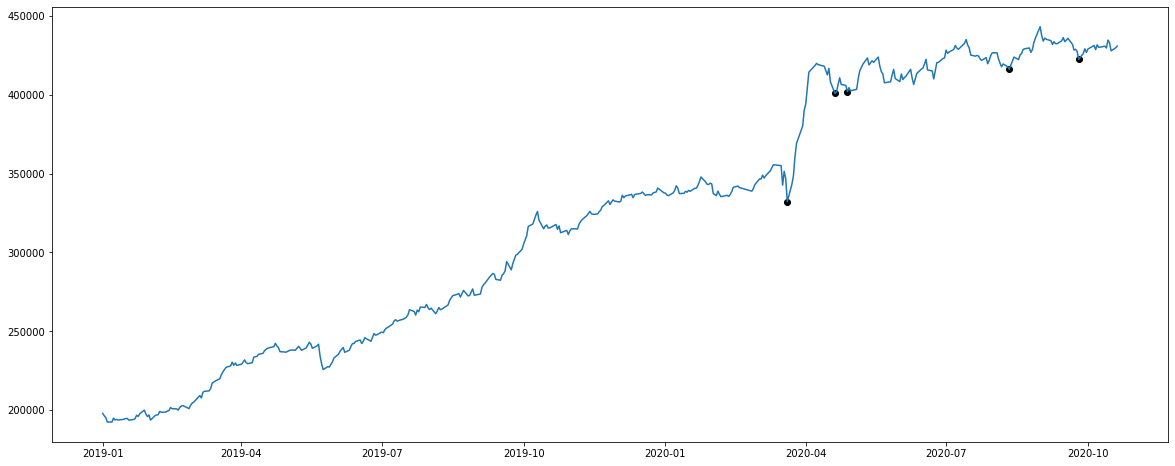

In [293]:
drawdown_figure = plt.figure(figsize=(20,8))
plt.plot(intraday_trade_log['Date'],intraday_trade_log['Equity'])
plt.scatter(drawdown_df['Date'],drawdown_df['Equity'],color='black')

In [298]:
returns['Month-Year'] = returns.apply(lambda x: (str(x['Month']) + ' ' + str(x['Year'])[-2:]).upper(),axis=1)

<AxesSubplot:xlabel='Month-Year', ylabel='%Change'>

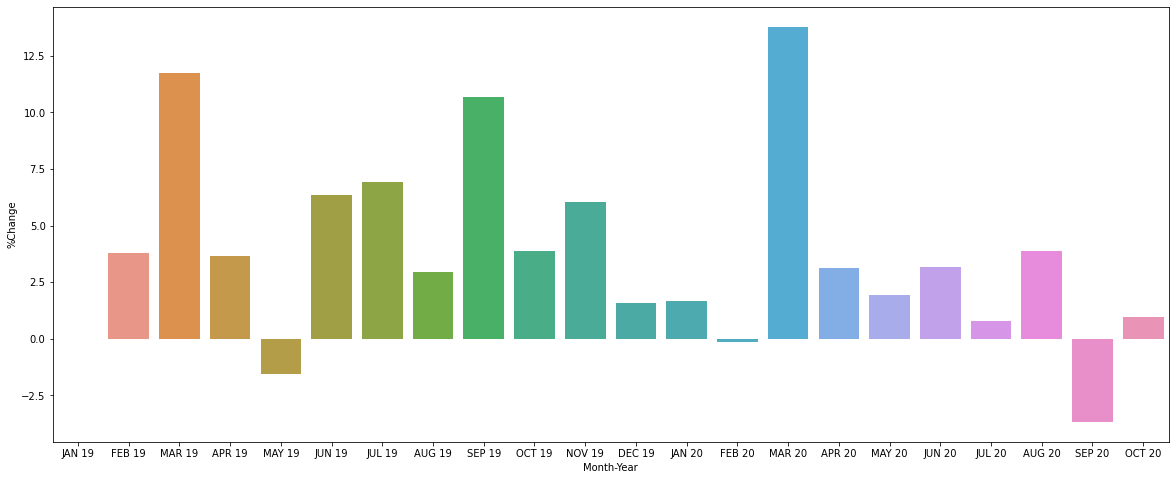

In [304]:
monthly_returns_barplot = plt.figure(figsize=(20,8))
sns.barplot(x='Month-Year',y='%Change',data=returns,estimator=np.median,ci=0)

In [301]:
metrics.T

,0
Backtest Start Date,2019-01-01
Backtest End Date,2020-10-20
Number of Trades,435
Number of Wins,274
Number of Losses,161
Average Profit,2205.9
Average Loss,-2320.46
Maximum Profit Points,20188.68
Maximum Loss Points,-14718.38
Median Trade,748.13


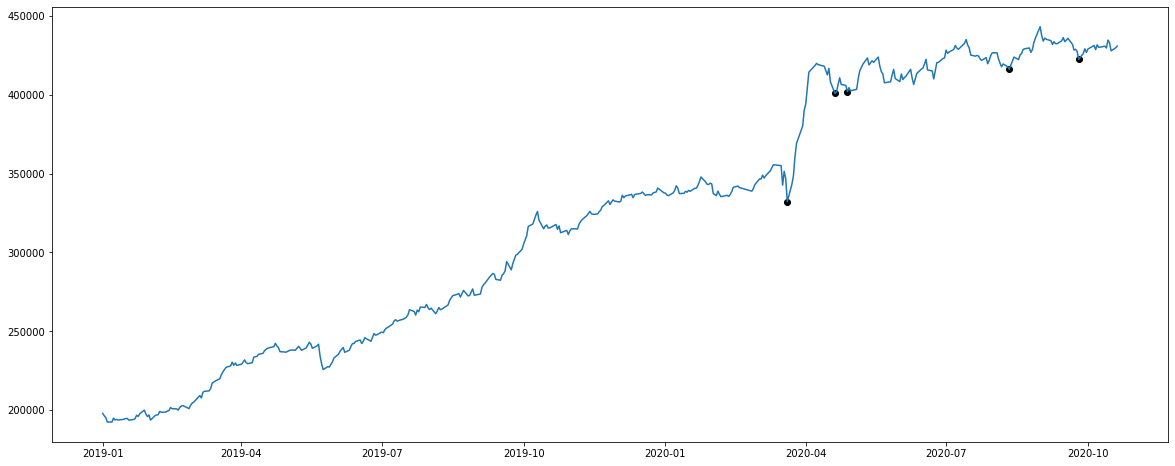

In [302]:
drawdown_figure

In [303]:
broad_returns_image

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
Year,,,,,,,,,,,,,
2019,nan,3.76,11.74,3.66,-1.56,6.35,6.91,2.95,10.69,3.86,6.02,1.57,55.96
2020,1.68,-0.15,13.79,3.13,1.93,3.19,0.77,3.88,-3.68,0.94,nan,nan,25.47


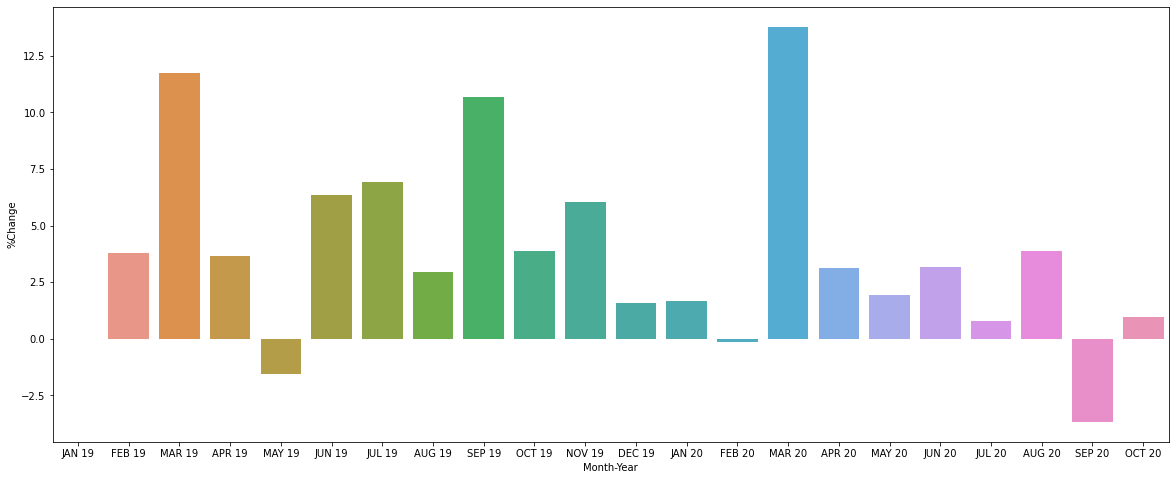

In [305]:
monthly_returns_barplot